In [1]:
import biosteam as bst
import thermosteam as tmo
import biorefineries as bf
from biorefineries import cellulosic
from biosteam import main_flowsheet as F
from cellulosic_tea import create_cellulosic_ethanol_tea


In [2]:
# Code just to increase the number of display units for the various components
tmo.Stream.display_units.N = 40       # Increasing number of display units to see all components of streams 
tmo.MultiStream.display_units.N = 40  
bst.Stream.display_units.N = 40       # Increasing number of display units to see all components of streams 
bst.MultiStream.display_units.N = 40  

In [3]:
bst.nbtutorial() # Light-mode html diagrams and filter warnings

In [4]:
chems = cellulosic.create_cellulosic_ethanol_chemicals().copy()


In [5]:
bst.settings.set_thermo(chems) # Setting thermodynamic property pacakge for the chemicals


In [6]:
stover = bst.Stream(
                ID='Stover',
                price=0.0516,
                total_flow=104229.16,
                units='kg/hr',
                Water=0.20215,
                Sucrose=0.00623,
                Extract=0.11846,
                Acetate=0.01464,
                Ash=0.03986,
                Lignin=0.12744,
                Protein=0.02507,
                Glucan=0.28302,
                Xylan=0.15788,
                Arabinan=0.01925,
                Mannan=0.00485,
                Galactan=0.00116,
            )

In [7]:
etoh_system = cellulosic.create_cellulosic_ethanol_system(ins = stover)

In [8]:
etoh_system.simulate()

In [9]:
etoh_system.show()

System: cornstover_sys
Highest convergence error among components in recycle
stream M604-0 after 1 loops:
- flow rate   8.16e+00 kmol/hr (0.025%)
- temperature 4.64e-06 K (1.5e-06%)
ins...
[0] Stover  
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow (kmol/hr): Water    1.17e+03
                    Sucrose  1.9
                    Extract  68.5
                    Acetate  25.4
                    Ash      4.15e+03
                    Lignin   87.3
                    Protein  114
                    ...      326
[1] sulfuric_acid  
    phase: 'l', T: 294.15 K, P: 547155 Pa
    flow (kmol/hr): Water  7.2
                    H2SO4  18.3
[2] ammonia  
    phase: 'l', T: 298.15 K, P: 1.2159e+06 Pa
    flow (kmol/hr): NH3    1
                    NH4OH  36.6
[3] denaturant  
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow (kmol/hr): Denaturant  4.14
outs...
[0] ethanol  
    phase: 'l', T: 339.26 K, P: 101325 Pa
    flow (kmol/hr): Water       9.84
                    Ethanol     463


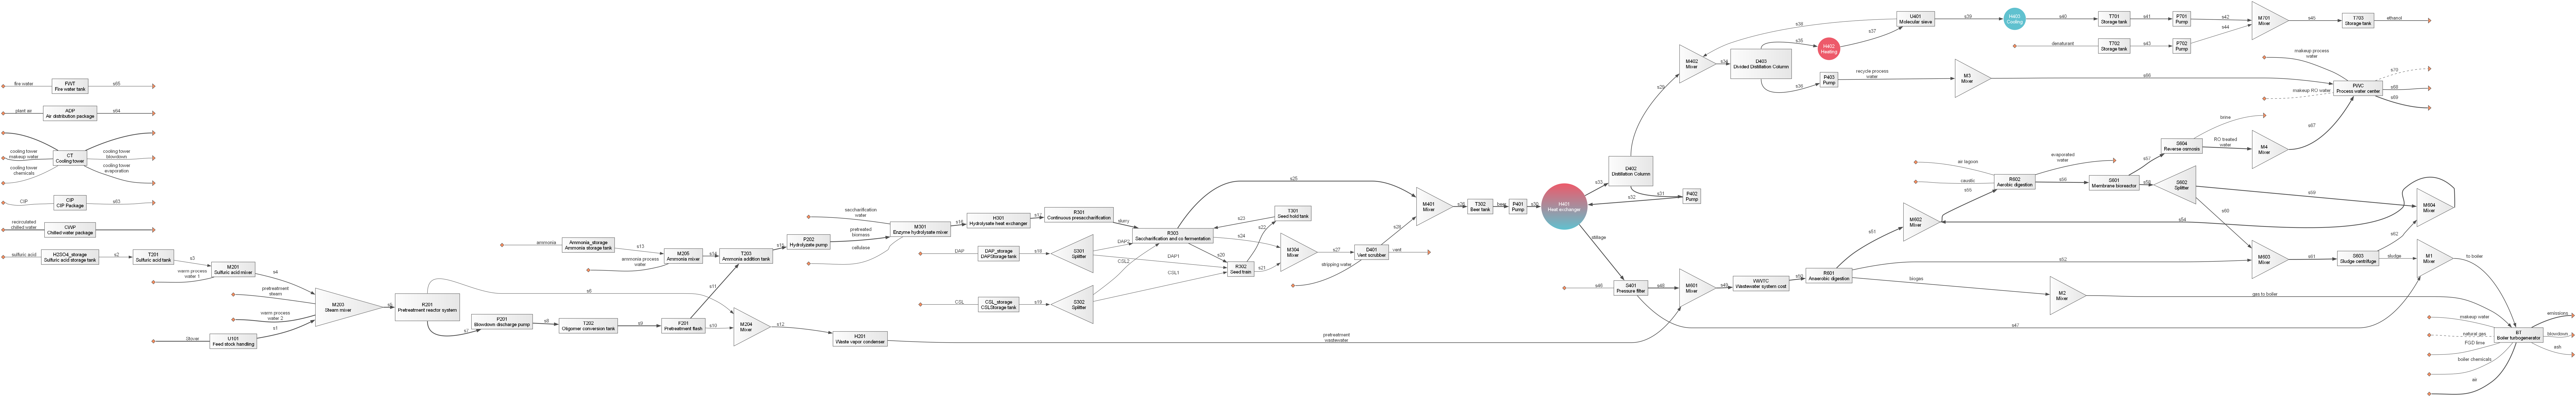

In [10]:
etoh_system.diagram(format = 'png')

In [11]:
tea = create_cellulosic_ethanol_tea(etoh_system)

In [12]:
#tea.save_report('humbird_report.xlsx')


In [13]:
#R201
#R303 modelled as a batch reactor and has volume, but not weight and wall thickness like a conventional pressure vessel
# None of the other reactors have weight and wall thickness

In [14]:
etoh_system.diagram()

In [25]:
F.T701

StorageTank: T701
ins...
[0] s40  from  HXutility-H403
    phase: 'l', T: 340 K, P: 162120 Pa
    flow (kmol/hr): Water    9.84
                    Ethanol  463
                    NH3      0.79
outs...
[0] s41  to  Pump-P701
    phase: 'l', T: 340 K, P: 162120 Pa
    flow (kmol/hr): Water    9.84
                    Ethanol  463
                    NH3      0.79


In [16]:
F.Ammonia_storage

AmmoniaStorageTank: Ammonia_storage
ins...
[0] ammonia  
    phase: 'l', T: 298.15 K, P: 1.2159e+06 Pa
    flow (kmol/hr): NH3    1
                    NH4OH  36.6
outs...
[0] s13  to  AmmoniaMixer-M205
    phase: 'l', T: 298.15 K, P: 1.2159e+06 Pa
    flow (kmol/hr): NH3    1
                    NH4OH  36.6


In [17]:
F.D403

BinaryDistillation: D403
ins...
[0] s34  from  Mixer-M402
    phase: 'g', T: 386.4 K, P: 162120 Pa
    flow (kmol/hr): Water    1.31e+03
                    Ethanol  552
                    NH3      0.79
outs...
[0] s35  to  HXutility-H402
    phase: 'g', T: 363.92 K, P: 162120 Pa
    flow (kmol/hr): Water    131
                    Ethanol  552
                    NH3      0.79
[1] s36  to  Pump-P403
    phase: 'l', T: 386.85 K, P: 162120 Pa
    flow (kmol/hr): Water    1.18e+03
                    Ethanol  0.00461


In [18]:
F.D402

BinaryDistillation: D402
ins...
[0] s33  from  HXprocess-H401
    phase: 'l', T: 378.33 K, P: 607950 Pa
    flow (kmol/hr): Water       2.04e+04
                    Ethanol     463
                    AceticAcid  20.8
                    Furfural    3.23
                    Glycerol    1.85
                    NH3         0.79
                    LacticAcid  18.4
                    ...         4.58e+03
outs...
[0] s29  to  Mixer-M402
    phase: 'g', T: 386.14 K, P: 212782 Pa
    flow (kmol/hr): Water    1.19e+03
                    Ethanol  463
                    NH3      0.79
[1] s31  to  Pump-P402
    phase: 'l', T: 395.32 K, P: 212782 Pa
    flow (kmol/hr): Water         1.92e+04
                    Ethanol       0.075
                    AceticAcid    20.8
                    Furfural      3.23
                    Glycerol      1.85
                    LacticAcid    18.4
                    SuccinicAcid  3.61
                    ...           4.58e+03


In [19]:
F.T201.results()

Sulfuric acid tank              Units     T201
Electricity         Power          kW    0.518
                    Cost       USD/hr   0.0405
Design              Flow rate   kg/hr 1.93e+03
Purchase cost       Pump          USD 5.14e+03
                    Tank          USD 6.27e+03
Total purchase cost               USD 1.14e+04
Utility cost                   USD/hr   0.0405

In [20]:
bst.units.AuxiliaryPressureVessel

biosteam.units.auxiliary_pressure_vessel.AuxiliaryPressureVessel